# Data Madness!
#### Group 25

Imanol Mugarza Pascual (i-6241042), Youssef Ben Mansour(i-6245809) and Diogo Reis Rion (i-6265026)

# xG (Expected Goal) model for the predictions of goals

## What we aim for with this notebook?

The aim of creating an xG (expected goals) model is to predict the probability of a shot resulting in a goal in a football (soccer) match. This is achieved by analyzing various factors such as the location of the shot, the angle of the shot, the type of shot, the player's position and body posture, the number of defenders in the way, and other contextual factors. The xG model uses historical data to train a statistical model that can then be applied to future matches to predict the likelihood of a goal being scored from a particular shot. The model can be used by coaches and analysts to gain insights into a team's performance, identify areas for improvement, and make tactical decisions based on data-driven analysis.

# Research Questions 

1. Which parameter has a bigger impact in the xG model?

2. How does the distance and angle impact on the probability of scoring?

3. Which model has a better performance?

# Dataset

Link: https://github.com/icegorilla12/Expected-Goals 

The dataset we found contains over 40k football shot situations.

-playerId: This is a unique identifier for the player in the dataset. It is used to link events and actions to the specific player who performed them.

-id: This is a unique identifier for each event or action that occurs during a football match. It can be used to track the sequence of events and analyze the flow of the game.

-x_coordinates: This feature represents the horizontal position of a player or ball on the field, measured in meters from the left touchline.

-y_coordinates: This feature represents the vertical position of a player or ball on the field, measured in meters from the bottom touchline.

-blocked: This feature indicates whether a shot or pass was blocked by an opposing player.

-goal: This feature indicates whether a shot resulted in a goal.

-time: This feature indicates the time in minutes elapsed since the start of the match when the event or action occurred.

-matchPeriod: This feature indicates whether the event or action occurred in the first half or second half of the match.

-counter: This feature represents the counter-attack status of the event or action.

-competition: This feature represents the competition or league in which the match was played.

-foot: This feature indicates which foot the player used to perform the event or action.

-bodypart: This feature indicates which body part the player used to perform the event or action.

-preferrence: This feature represents the preferred foot of the player.

-angles: This feature represents the angle between the player's direction of motion and the goal.

-distance: This feature represents the distance between the player or ball and the goal.

-headers: This feature indicates whether the event or action involved a header.

-xG: This feature represents the expected goals value of a shot, which is a statistical estimate of the probability that a shot will result in a goal.

# PREPARATION

In this section we are going to import all the neccessary libraries and the dataset that we are going to use.



In [1]:
#importing the libraries that we are going to be using during the project
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
from mplsoccer import Pitch, VerticalPitch
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score
from imblearn.over_sampling import SMOTE



In [2]:
#the dataset we are going to use
dataset=pd.read_csv('allShots copia.csv')
dataset

,playerId,id,x_coordinates,y_coordinates,blocked,goal,time,matchPeriod,counter,competition,foot,bodypart,preferrence,angles,distance,headers,xG
0,25413,177959212,92.40,27.88,0.0,1.0,2.0,0,0.0,0,1.0,1.0,1.0,26.77,14.01,0.0,0.1466
1,26150,177959247,89.25,35.36,0.0,0.0,3.0,0,0.0,0,0.0,2.0,1.0,25.99,15.81,0.0,0.1106
2,14763,177959280,100.80,35.36,0.0,1.0,4.0,0,0.0,0,1.0,3.0,1.0,78.79,4.41,1.0,0.4348
3,7868,177959289,85.05,22.44,0.0,0.0,7.0,0,0.0,0,1.0,2.0,0.0,15.74,23.06,0.0,0.0331
4,7868,177959429,78.75,20.40,0.0,0.0,14.0,0,0.0,0,1.0,1.0,1.0,12.59,29.56,0.0,0.0165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43073,25575,90588469,81.90,41.48,1.0,0.0,85.0,1,0.0,6,1.0,2.0,0.0,16.36,24.28,0.0,0.0231
43074,25575,90588583,97.65,28.56,0.0,0.0,91.0,1,0.0,6,1.0,1.0,1.0,37.46,9.14,0.0,0.2714
43075,70410,90589205,94.50,25.84,0.0,0.0,13.0,2,0.0,6,1.0,3.0,1.0,25.19,13.30,1.0,0.0895
43076,70410,90589254,80.85,31.28,0.0,1.0,3.0,3,0.0,6,1.0,1.0,1.0,17.03,24.30,0.0,0.0461


# 1 EDA
In this section we are going to try to understand the distributions of the data

# 1.1 HISTOGRAM OF THE ANGLE, DISTANCE AND TIME

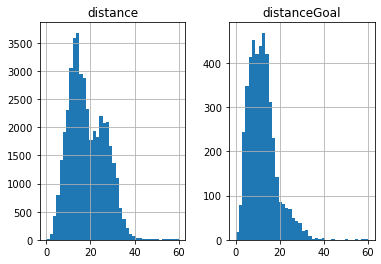

In [3]:
#plot distributions of shots by distance and angle side by side

fig, axes = plt.subplots(1, 2)
dataset3 = dataset.copy()
dataset3['distanceGoal'] = dataset.loc[dataset['goal'] == 1].distance
histogram_of_distace = dataset.hist("distance",bins=40,range = (0,60),ax= axes[0])
histogram_of_distanceGoal = dataset3.hist("distanceGoal",bins=40, range = (0,60),ax=axes[1])



In general, it can be observed that shots taken from inside the penalty area have a higher likelihood of scoring a goal compared to shots taken from outside the penalty area. Looking at the shot distribution, it can be seen that the majority of shots were taken from a distance between 10 and 20 meters. However, the highest number of goals were scored from a distance of 0 to 10 meters from the goal line. This is logical as the shorter the distance to the goal, the higher the probability of scoring a goal. There may be some outlier shots taken from far distances that resulted in a goal, but these occurrences are infrequent.

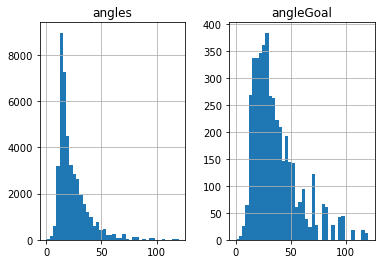

In [4]:
#plot distributions of shots by distance and angle side by side
fig, axes = plt.subplots(1, 2)
dataset3 = dataset.copy()
dataset3['angleGoal'] = dataset.loc[dataset['goal'] == 1].angles
histogram_of_angle = dataset.hist("angles",bins=40,range = (0,120),ax= axes[0])
histogram_of_angleGoal = dataset3.hist("angleGoal",bins=40, range = (0,120),ax=axes[1])


As expected, the distribution of shots shows that players tend to avoid taking shots from angles less than 5 degrees, which are typically central shots close to the goal. The angle distribution corresponds to the distance distribution, as shots taken from closer distances (larger angles) are more challenging to produce. From the distribution chart, it can be concluded that it is challenging to produce shots that are both close and central to the goal.

However, while we now have an understanding of how shots are distributed by distance and angle, we still need to investigate how shots resulting in goals differ from those that do not.

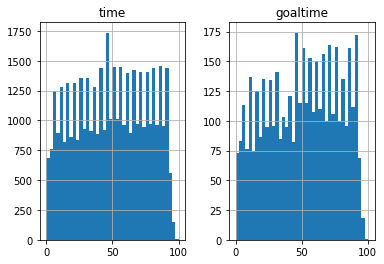

In [5]:
fig, axes = plt.subplots(1, 2)
histogram_of_time = dataset.hist("time", bins=40, range = (0,100), ax=axes[0])
#goal time
dataset2 = dataset.copy()
#hacerlo con el tiempor en el que se mete el gol
dataset2['goaltime'] = dataset2.loc[dataset['goal'] == 1].time
histogram_of_time2 = dataset2.hist("goaltime", bins=40, range = (0,100), ax=axes[1])

Although the time variable may not provide a lot of information on its own in a football dataset, it can still be observed that there are spikes in the number of goals scored towards the end of matches. This could be due to the urgency to score a goal when a team is losing, which often leads to taking more risks. However, taking more risks can also make the team more vulnerable to conceding goals. Additionally, players may be more fatigued towards the end of the match, which could impact their performance and create more opportunities for goals. Overall, the time variable can provide some insight into the patterns of goal-scoring in football matches.

# 1.2 VIOLIN PLOTS

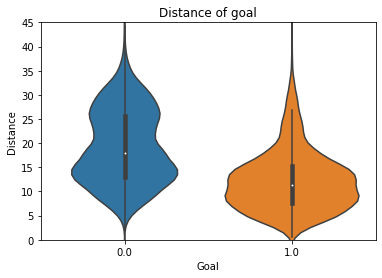

In [6]:
#violin plots

violin_plot_distance = sns.violinplot(x="goal", y="distance",data=dataset)
plt.ylim(0,45)
plt.ylabel("Distance")
plt.xlabel("Goal")
plt.title('Distance of goal')
plt.show()

The average distance of shots resulting in goals is approximately 12 meters, while shots that do not hit the net have an average distance of around 18 meters. Moreover, goals are typically scored from angles between 20 degrees and approximately 50 degrees.

Therefore, although it is difficult to produce shots that are close and central to the goal, the violin plot suggests that shots taken from these positions are more likely to result in goals.

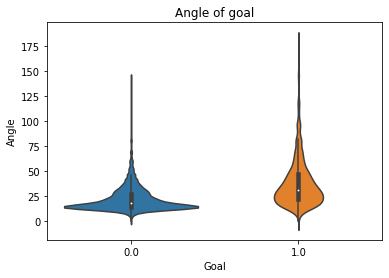

In [7]:
violin_plot_angle = sns.violinplot(x="goal", y="angles",data=dataset)
plt.ylabel("Angle")
plt.xlabel("Goal")
plt.title('Angle of goal')
plt.show()


The violin plot presented in the analysis is similar to a box and whisker plot, but it provides additional information about the distribution of data using kernel density estimation. By dividing the data based on the result of the shot, it is evident that shots that result in goals are taken much closer to the goal than shots that do not result in goals. On average, the mean distance of shots resulting in goals is around 12 meters, while the mean distance for shots that do not result in goals is approximately 18 meters. Furthermore, the plot reveals that goals are typically scored from angles ranging from 20 degrees to approximately 50 degrees.

Thus, although it is challenging to produce shooting opportunities close to the goal, the violin plot suggests that shots taken from positions that are both close and central to the goal tend to result in goals.

Now let´s see at the headers, we might conclude new things

In [8]:
#geting the shots with the head
def headers(dataset):
    headers=dataset.loc[dataset['headers']==1]
    return headers

headers = headers(dataset)


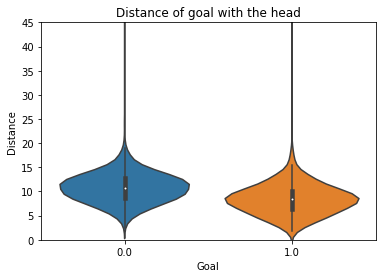

In [9]:
shot_distance = sns.violinplot(x="goal", y="distance", data=headers)
plt.ylim(0,45)
plt.ylabel("Distance")
plt.xlabel("Goal")
plt.title('Distance of goal with the head')
plt.show()

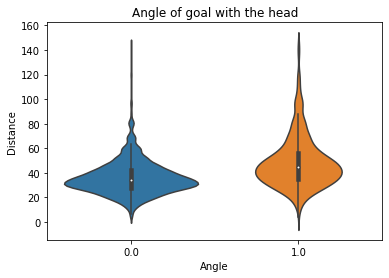

In [10]:
shot_ang = sns.violinplot(x="goal", y="angles", data=headers)
plt.ylabel("Distance")
plt.xlabel("Angle")
plt.title('Angle of goal with the head')
plt.show()

We expect that headed shots resulting in goals are usually taken from a distance close to the goal, and the analysis confirms that the majority of headed goals are indeed scored from a distance of less than 10 meters. Additionally, it is interesting to note that the angle of headed goals tends to be greater than 40 degrees, which suggests that it is more effective to head the ball with a more pronounced angle rather than attempting a direct, flat header towards the goal.

# 1.3 Correlation matrix

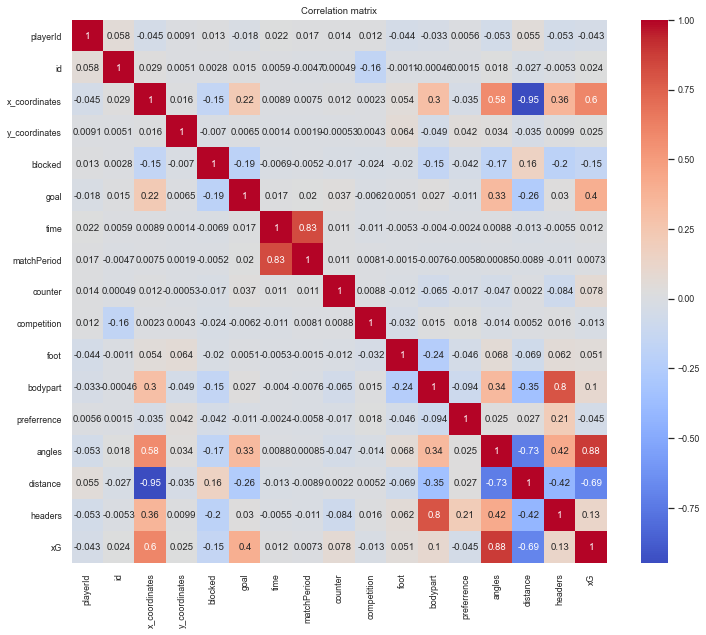

In [11]:
corr_matrix = dataset.corr()


plt.figure(figsize=(12, 10))
sns.set(font_scale=0.8)


sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation matrix')
plt.show()

The correlation matrix shows the degree of relationship between pairs of variables on a scale from -1 to 1. Values close to 1 indicate a strong positive correlation, meaning that as one variable increases, so does the other. Values close to -1 indicate a strong negative correlation, meaning that as one variable increases, the other decreases. Values close to 0 indicate no correlation between the variables.

It is important to interpret the correlation matrix carefully, as a high correlation between two variables does not always indicate a causal relationship. Additionally, it is possible that some variables are indirectly correlated through other variables in the dataset. Therefore, it is necessary to consider the relationship between all variables and take into account the context and nature of the problem in order to obtain an accurate interpretation of the correlation matrix.

In the correlation matrix of our football dataset, we have observed that the variables of distance to the goal and angle to the goal are highly relevant in determining the probability of scoring a goal. In particular, we have found a positive correlation between angle to the goal and the probability of scoring, meaning that as the angle increases, so does the probability of scoring a goal. On the other hand, we have found a negative correlation between distance to the goal and the probability of scoring, indicating that as the distance decreases, the probability of scoring a goal increases.

# 1.4 COUNTPLOTS AND PIE PLOTS

Text(0.5, 1.0, 'Body part countplot')

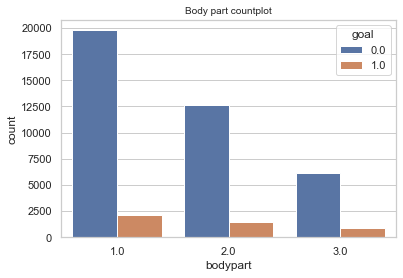

In [12]:
sns.set_theme(style="whitegrid")
sns.countplot(x=dataset["bodypart"], data = dataset, hue = dataset['goal'])
plt.title('Body part countplot', fontsize=10)

In the dataset, the value 1 corresponds to shots taken with the right foot, 2 to shots taken with the left foot, and 3 to shots taken with the head. It can be observed that the majority of shots, a total of 20,000, were taken with the right foot, which is expected given that most people are right-footed. Additionally, approximately 12,500 shots were taken with the left foot, while around 6,000 shots were taken with the head.

Text(0.5, 1.0, 'Foot countplot')

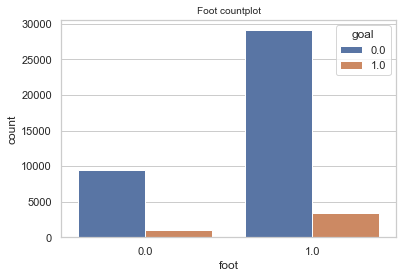

In [13]:
sns.set_theme(style="whitegrid")
sns.countplot(x=dataset["foot"], data = dataset, hue = dataset['goal'])
plt.title('Foot countplot', fontsize=10)

The data indicates the preferred foot of the player taking the shot, with 1 representing the right foot and 0 representing the left foot. As previously observed, the majority of shots were taken with the right foot.

In [14]:
#basic operations that we are going to be using along the project

#total goals
totalGoals=dataset.loc[dataset['goal']==1, 'goal'].sum()
#total shots
totalShots=dataset.shape[0]
#not resulting goals
noGoals=totalShots-totalGoals
#goals in a counter attact
counterAttactGoals=dataset.loc[dataset['counter']==1, 'goal'].sum()
#headers goals
headerGoals=dataset.loc[dataset['headers']==1, 'goal'].sum()
#goals in a counter attact
counterAttactGoals=dataset.loc[dataset['counter']==1, 'goal'].sum()
#headers goals
headerGoals=dataset.loc[dataset['headers']==1, 'goal'].sum()

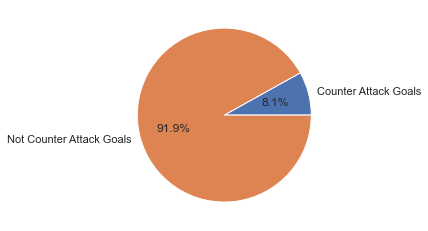

In [15]:
percentageCounterAttack =plt.pie([counterAttactGoals,totalGoals-counterAttactGoals],labels=['Counter Attack Goals','Not Counter Attack Goals'],autopct='%1.1f%%')

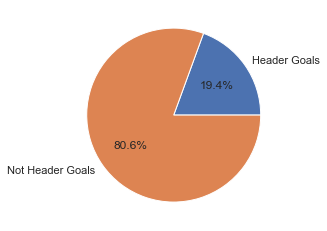

In [16]:
percentageHeaders =plt.pie([headerGoals,totalGoals-headerGoals],labels=['Header Goals','Not Header Goals'],autopct='%1.1f%%')

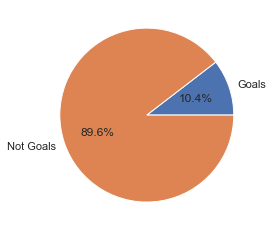

In [17]:
percentageOfGoals =plt.pie([totalGoals,noGoals],labels=['Goals','Not Goals'], autopct='%1.1f%%')

If the variable we want to predict has many more 0s than 1s, this can cause class imbalance in our dataset. This can result in the classification model having difficulty in accurately predicting the minority class (in this case, class 1) and may generate a model that predominantly predicts the majority class (in this case, class 0).

To handle class imbalance, there are several techniques that can be used, such as oversampling the minority class, subsampling the majority class, or using classification algorithms that are designed to handle class imbalance, such as weighted logistic regression or support vector machines with weights. The decision threshold of the model can also be adjusted to improve the accuracy of the minority class. It is important to select the appropriate class imbalance handling technique for the dataset and the specific problem being addressed.

We will be applying some of the above technique if we have any accuracy problem later on.

# 1.4 MAP VISUALIZATION

Now we will move on to the visualization part on the football field. Here, everything will become clearer and we will be able to see whether the outliers present are relevant or not.

We are going to use mplsoccer for the visualization.
Mplsoccer is a Python package for data visualization in soccer (football). It is built on top of the popular matplotlib library and provides a variety of functions and tools to create high-quality visualizations of soccer matches, such as heatmaps, xG (expected goals) plots, pass networks, and shot charts. The package also includes a set of pre-defined styles to make it easy to create beautiful and informative soccer visualizations

In [18]:
#getting the list of goals of the dataset
def goalShots(dataset):
    goals=dataset.loc[dataset['goal']==1]
    return goals

def noGoalShots(dataset):
    goals=dataset.loc[dataset['goal']==0]
    return goals

def goalShotsWithoutHeaders(dataset):
    dat = goalShots(dataset)
    goals = dat.loc[dat['headers'] == 0]
    return goals

def noGoalShotsWithoutHeaders(dataset):
    dat = noGoalShots(dataset)
    goals = dat.loc[dat['headers'] == 0]
    return goals
        
def goalShotsWithHeaders(dataset):
    dat = goalShots(dataset)
    goals = dat.loc[dat['headers'] == 1]
    return goals
         

In [19]:
#All goals
allGoals =goalShots(dataset)
#Not goal
noGoal = noGoalShots(dataset)
#All goal shots without headers
goalShot = goalShotsWithoutHeaders(dataset)
#Not goal without header
noGoalWithoutHeader = noGoalShots(dataset)
#Goal with header
goalWithHeader = goalShotsWithHeaders(dataset)

Text(0.5, 1.0, 'All Shot Map')

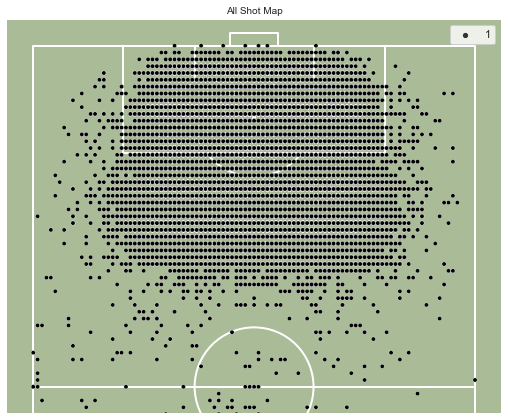

In [20]:
pitch = VerticalPitch(pitch_type='custom',half=True, goal_type='box', line_color='white', pitch_color='#aabb97', linewidth=2,pitch_length=105, pitch_width=68)

pitch.draw(figsize=(8,6))
sns.scatterplot(data=goalShot, y='x_coordinates', x='y_coordinates', size=1, alpha=1, color='black',legend=False)
sns.scatterplot(data=noGoalWithoutHeader, y='x_coordinates', x='y_coordinates', size=1,  alpha=1,color='black')
plt.title('All Shot Map', fontsize=10)

Text(0.5, 1.0, 'Goal Shot Map Without headers')

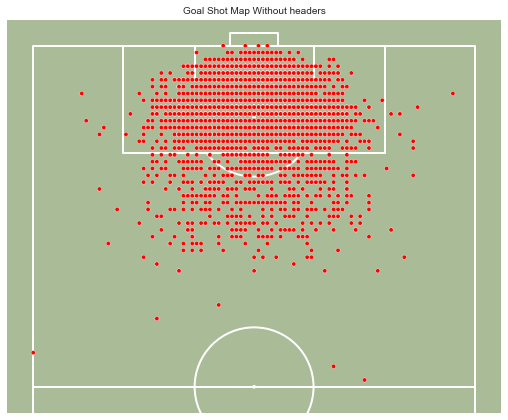

In [21]:
pitch = VerticalPitch(pitch_type='custom',half=True, goal_type='box', line_color='white', pitch_color='#aabb97', linewidth=2,pitch_length=105, pitch_width=68)

pitch.draw(figsize=(8,6))
sns.scatterplot(data=goalShot, y='x_coordinates', x='y_coordinates', size=1, alpha=1, color='red',legend=False)
#sns.scatterplot(data=noGoalWithoutHeader, y='x_coordinates', x='y_coordinates', size=1,  alpha=1,color='black')
plt.title('Goal Shot Map Without headers', fontsize=10)

Text(0.5, 1.0, 'Goal Shot Map With headers')

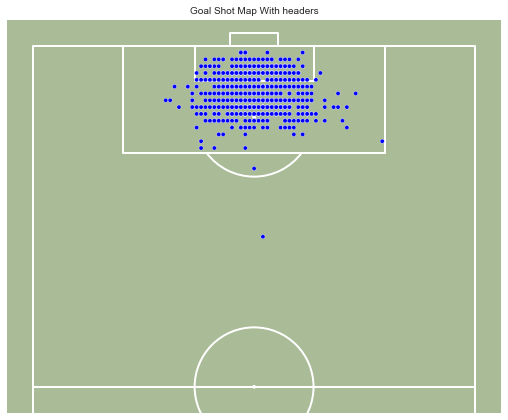

In [22]:
pitch = VerticalPitch(pitch_type='custom',half=True, goal_type='box', line_color='white', pitch_color='#aabb97', linewidth=2,pitch_length=105, pitch_width=68)

pitch.draw(figsize=(8,6))
sns.scatterplot(data=goalWithHeader, y='x_coordinates', x='y_coordinates', size=1, alpha=1, color='blue',legend=False)
#sns.scatterplot(data=noGoalWithoutHeader, y='x_coordinates', x='y_coordinates', size=1,  alpha=1,color='black')
plt.title('Goal Shot Map With headers', fontsize=10)

As a conclusion from the visualization, it is also that the closer we are to the goal and the more centered we are, the easier it will be to score a goal.

# 2 Models

# 2.1 Logistic regression

A logistic regression is commonly used for xG models because the outcome variable in xG models is binary (goal or no goal). Logistic regression models are well-suited for binary classification tasks and can estimate the probability of an event occurring (in this case, the probability of a shot resulting in a goal) based on a set of predictor variables such as distance to the goal, angle, and other factors. By using logistic regression, we can model the relationship between these predictor variables and the probability of a shot resulting in a goal, and use this model to estimate the xG value for each shot.

In [65]:
from sklearn.linear_model import LogisticRegression

#we are droping this variables because they do not give us information about the shot
#or because we can derive from that variable the outcome
X = dataset.drop(['blocked','goal','id','playerId','xG',] , axis = 1)
y = dataset['goal']
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state=15)


In [66]:
log_reg = LogisticRegression(random_state=10, solver = 'liblinear')

log_reg.fit(X_train, y_train)

LogisticRegression(random_state=10, solver='liblinear')

In [67]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss

log_reg.predict(X_train)
y_pred = log_reg.predict(X_train)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(X_train)

# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(X_train, y_train))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(X_test, y_test))


The Training Accuracy is:  0.9014566769195056
The Testing Accuracy is:  0.8979805013927576


In [68]:
def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, xticklabels=classes, yticklabels=classes, vmin=0., vmax=1., annot=True, annot_kws={'size':50})
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

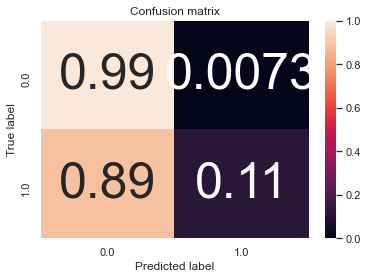

In [69]:
cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

In the case of your logistic regression model, it is correctly identifying 99% of the positive cases (true positives) but it is also misclassifying 11% of the actual positive cases as negative (false negatives). This means that there is a risk of false negatives, or missed opportunities to detect positive cases, which can be problematic depending on the specific application.

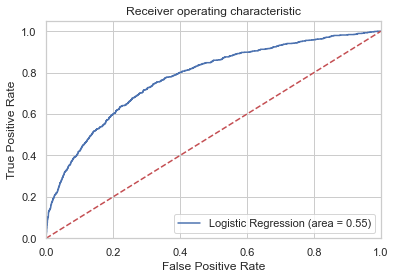

In [28]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

An AUC of 0.56 indicates that the logistic regression model is only slightly better than random guessing in distinguishing between positive and negative cases. AUC ranges from 0.5 (random guessing) to 1 (perfect classification), so an AUC of 0.56 is quite low.

This may suggest that the model is not capturing the underlying patterns in the data very well, or that the choice of features or hyperparameters is not appropriate.

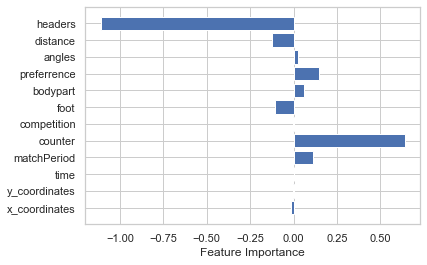

In [29]:
# Get the feature importance
importance = log_reg.coef_[0]

# Create a bar chart of feature importance
plt.barh(X.columns, importance)

# Set the y-axis labels
plt.yticks(np.arange(len(X.columns)), X.columns)

# Set the x-axis label
plt.xlabel("Feature Importance")

# Show the plot
plt.show()

The features with more influece in the model are the headers ans the counter attacks.

We can observe that the performance of the model is quite poor. So, we are going to try to improve our model.

Using SMOTE to address class imbalance is a good approach to try to improve the performance of your model. SMOTE (Synthetic Minority Over-sampling Technique) is a technique that creates synthetic samples of the minority class by interpolating between existing minority class samples. This can help balance the distribution of the classes and improve the ability of the model to accurately predict the minority class.

# 2.1.1 SMOTE 

In [30]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state=15)
sm = SMOTE()
x_train_res,y_train_res = sm.fit_resample(X_train,y_train)
x_test_res,y_test_res = sm.fit_resample(X_test,y_test)


In [70]:
log_reg = LogisticRegression(random_state=10, solver = 'liblinear')

log_reg.fit(x_train_res, y_train_res)
log_reg.predict(x_train_res)
y_pred = log_reg.predict(x_train_res)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(x_train_res)

# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train_res, y_train_res))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test_res, y_test_res))



The Training Accuracy is:  0.7219722959414849
The Testing Accuracy is:  0.7232049947970863


Although the training and testing accuracy have both decreased by approximately 0.2, we can still assess whether the model is now better at predicting shots that result in goals by examining the confusion matrix.

The confusion matrix provides information on the true positive (TP), true negative (TN), false positive (FP), and false negative (FN) predictions made by the model. Specifically, for a goal prediction model, the TP represents the number of shots that the model correctly predicted as goals, while the FN represents the number of shots that were actually goals but were incorrectly predicted as non-goals.

By examining the confusion matrix, we can see if the number of TP and FN predictions have changed significantly with the new model. If the number of TP predictions has increased and/or the number of FN predictions has decreased, this would indicate that the model is now better at predicting shots that result in goals, even if the overall accuracy has decreased.

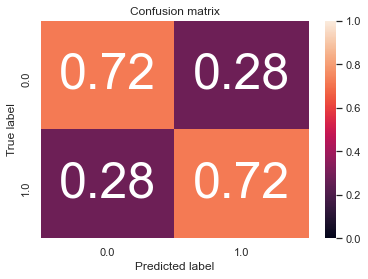

In [32]:
cm = confusion_matrix(y_train_res, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

A True Positive (TP) rate of 0.72 means that the model correctly predicted 72% of the shots that resulted in goals.

A False Negative (FN) rate of 0.72 means that the model incorrectly predicted 28% of the shots that resulted in goals as non-goals. In other words, the model missed almost one-third of the shots that resulted in goals.

It is true that the model has improved considerably compared to the previous model. The SMOTE technique helped in balancing the class distribution, which improved the model's ability to predict the minority class (goals in this case). However, even with SMOTE, the model is still not perfect and there is room for further improvement.


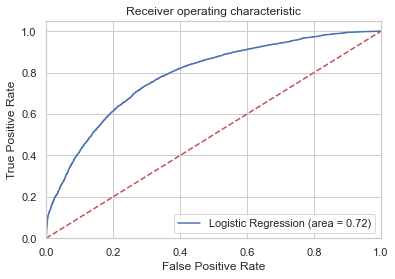

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test_res, log_reg.predict(x_test_res))
fpr, tpr, thresholds = roc_curve(y_test_res, log_reg.predict_proba(x_test_res)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

An AUC (Area Under the Curve) of 0.72 suggests that the model has some predictive power in distinguishing between positive and negative classes. However, an AUC of 0.5 represents a random guess, and an AUC value of 1 represents a perfect model. Therefore, an AUC of 0.72 indicates that there is still room for improvement in the model's overall performance.

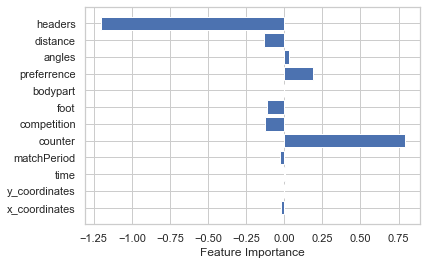

In [34]:
# Get the feature importance
importance = log_reg.coef_[0]

# Create a bar chart of feature importance
plt.barh(X.columns, importance)

# Set the y-axis labels
plt.yticks(np.arange(len(X.columns)), X.columns)

# Set the x-axis label
plt.xlabel("Feature Importance")

# Show the plot
plt.show()

# 2.1.2 Hyperparameter tuning for the Logistic Regression

In [71]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Define the logistic regression model
logreg = LogisticRegression()

# Define the parameter grid for hyperparameter tuning
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'penalty': ['l1', 'l2'],
              'solver': ['liblinear', 'saga']}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator = logreg, param_grid = param_grid, cv = 5, n_jobs = -1)
grid_search.fit(x_train_res, y_train_res)

# Print the best hyperparameters found
print("Best hyperparameters: ", grid_search.best_params_)

#In this code, we first define the logistic regression model and the parameter grid for hyperparameter tuning.
#We then perform GridSearchCV with 5-fold cross-validation and parallel computing (n_jobs = -1) to
#find the best hyperparameters. Finally, we print the best hyperparameters found by GridSearchCV.


Best hyperparameters:  {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}


In [72]:
log_reg = LogisticRegression(C=  1, penalty =  'l1', solver =  'liblinear')

log_reg.fit(x_train_res, y_train_res)
log_reg.predict(x_train_res)
y_pred = log_reg.predict(x_train_res)

# predict_proba - Probability estimates
pred_proba = log_reg.predict_proba(x_train_res)

# Accuracy on Train
print("The Training Accuracy is: ", log_reg.score(x_train_res, y_train_res))

# Accuracy on Test
print("The Testing Accuracy is: ", log_reg.score(x_test_res, y_test_res))


The Training Accuracy is:  0.7221017541588453
The Testing Accuracy is:  0.7235952133194589


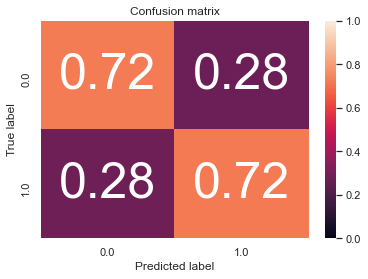

In [73]:
cm = confusion_matrix(y_train_res, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

Our model improves a little bit the testing accuracy of the model. But in general the model remains practicaly the same as befor in terms of performance.

# 2.2 Random Forest

Random Forest is a good algorithm for building an xG (expected goals) model because it is a powerful machine learning algorithm that is capable of handling both numerical and categorical data, and is well-suited for regression problems like xG prediction.

In [37]:
X = dataset.drop(['blocked','goal','id','playerId','xG'] , axis = 1)
y = dataset['goal']

In [38]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state=15)

In [39]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(X_train, y_train)
prediction_test = rf.predict(X=X_test)

In [40]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(X_train, y_train))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(X_test, y_test))

Training Accuracy is:  0.9985491265741977
Testing Accuracy is:  0.8857938718662952


In [41]:
# Confusion Matrix
cm = confusion_matrix(y_test, prediction_test)
cm

array([[7494,  194],
       [ 790,  138]])

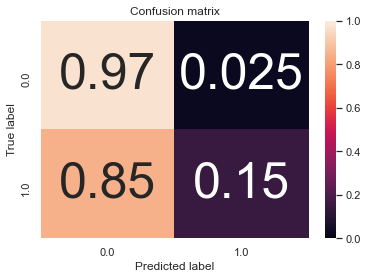

In [42]:
cm = confusion_matrix(y_test, prediction_test)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)
plot_confusion_matrix(cm_norm, classes = rf.classes_, title='Confusion matrix')

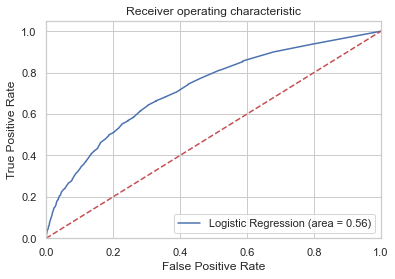

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

logit_roc_auc = roc_auc_score(y_test, rf.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<BarContainer object of 12 artists>

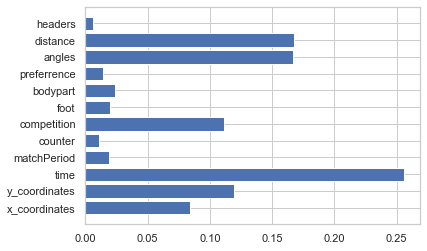

In [44]:
plt.barh(X.columns, rf.feature_importances_)

If the training accuracy is very high (0.999) while the testing accuracy is relatively lower (0.88), this may suggest that the model is overfitting to the training data. Overfitting occurs when a model learns the noise in the training data instead of the underlying patterns, resulting in a high accuracy on the training data but poor generalization to new, unseen data.

In this case, the high training accuracy of 0.999 suggests that the model is fitting the training data very well, possibly because the majority of the shots in the training data are missed. However, the lower testing accuracy of 0.88 suggests that the model is not generalizing well to new data.

The solution could be to increase the amount of data available for training, or to use a more representative sample of the data that includes a wider range of outcomes (i.e. both made and missed shots).

# 2.2.1 SMOTE

We can see that the predictive variable is very imbalanced. We are going to use SMOTE to solve this problem.

SMOTE (Synthetic Minority Over-sampling Technique) is an oversampling technique that is used to address the problem of class imbalance in a dataset. This problem occurs when a class of interest in the dataset is underrepresented compared to other classes. In out case we have much more miss goals than goals.

In the context of predictive modeling, when the predictor variable is imbalanced, i.e., when one of the classes has much lower frequency than the other, there can be a bias in the model that is fit. The model may be more prone to predicting the dominant class, leading to low accuracy in predicting the minority class.

SMOTE helps address this problem by generating new synthetic data for the minority class through interpolation and creating synthetic data points in the feature space that are close to the existing minority class data points. This way, the size of the minority class is increased, and the dataset is balanced.


In [45]:
X_train , X_test, y_train, y_test = train_test_split(X,y,train_size = 0.8,test_size = 0.2,random_state=15)
sm = SMOTE()
x_train_res,y_train_res = sm.fit_resample(X_train,y_train)
x_test_res,y_test_res = sm.fit_resample(X_test,y_test)


In [46]:
#checking if now the data in balanced in the train data for example

unique,count = np.unique(y_train_res,return_counts=True)
Y_train_dict_value_count = {k:v for (k,v) in zip(unique,count)}
Y_train_dict_value_count

#we can see that now the predictive value is balanced
#equal 0 and equal 1

{0.0: 30898, 1.0: 30898}

In [47]:
rf = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf.fit(x_train_res, y_train_res)
prediction_test = rf.predict(X=x_test_res)

In [48]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(x_train_res, y_train_res))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(x_test_res, y_test_res))

Training Accuracy is:  0.9991908861414979
Testing Accuracy is:  0.8606919875130072


In [49]:
# Confusion Matrix
cm = confusion_matrix(y_test_res, prediction_test)
cm

array([[7362,  326],
       [1816, 5872]])

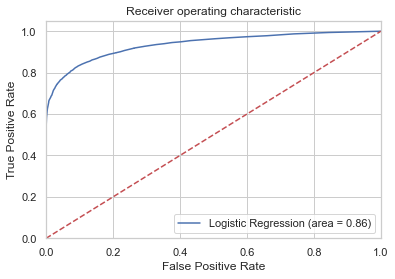

In [50]:
logit_roc_auc = roc_auc_score(y_test_res, rf.predict(x_test_res))
fpr, tpr, thresholds = roc_curve(y_test_res, rf.predict_proba(x_test_res)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

The increase in the rate of true negatives means that the model is now able to correctly identify more cases where no goals are scored in a match. This is an important metric to track, especially in cases where the negative class is the majority class (i.e., matches where no goals are scored). A high rate of true negatives means that the model is correctly predicting the absence of goals, which can be useful for making decisions such as team strategies, player substitutions, etc.

The improvement in AUC (Area Under the Curve) is also a good indication that our model is performing better than before. AUC is a widely used metric to evaluate the performance of binary classification models. It measures the trade-off between true positive rate and false positive rate for different threshold values. An AUC of 0.86 suggests that our model is able to distinguish between the positive and negative classes with high accuracy, which is a significant improvement from the previous performance.

Overall, it seems like the changes we have made, such as using SMOTE to address class imbalance, have had a positive impact on your model's performance. 

<BarContainer object of 12 artists>

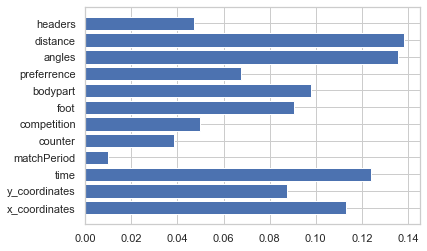

In [51]:
plt.barh(X.columns, rf.feature_importances_)

Distance and angle are key features in predicting goals, as they describe the position of the ball in relation to the goal. Distance to the goal is an important metric for predicting the probability of scoring a goal, as the closer the distance, the higher the probability of scoring. Additionally, the angle of the shot is also an important metric, as sharper angles can increase the probability of scoring compared to less sharp angles.

As for time, it's likely an important feature because the probability of scoring a goal can vary depending on the time of the match. For example, a team may have a higher probability of scoring a goal during the last few minutes of the match when they are desperate for a win.

The Y-coordinate may also be an important feature as it describes the position of the ball on the field in relation to the goalkeeper. Shots that are aimed at the center of the goal have a higher probability of being blocked by the goalkeeper, while shots aimed towards the sides have a higher probability of passing the goalkeeper and scoring a goal.

# 2.2.2 HYPERPARAMETER TUNING FOR RANDOM FOREST

Hyperparameter tuning is an important step in the process of building a Random Forest model because the performance of the model depends on the values of its hyperparameters. Hyperparameters are parameters that are set before the training of the model and cannot be learned from the data. Examples of hyperparameters in Random Forest include the number of trees in the forest, the maximum depth of each tree, the minimum number of samples required to split an internal node, and the number of features to consider when looking for the best split.

The choice of hyperparameters can significantly affect the performance of the model. For example, if the number of trees in the forest is too low, the model may not capture the complexity of the data and may suffer from underfitting. On the other hand, if the number of trees is too high, the model may overfit to the training data, resulting in poor generalization to new, unseen data.

Hyperparameter tuning involves selecting the optimal values of the hyperparameters that result in the best performance of the model. This is typically done through a search process over a range of possible values for each hyperparameter. The goal is to find the hyperparameters that result in the best performance on a validation set of data.

In [52]:
#hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV




# Define the hyperparameters to tune
params = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Train a random forest classifier with hyperparameter tuning
rfc = RandomForestClassifier()
search = RandomizedSearchCV(rfc, param_distributions=params, n_iter=10, cv=5, random_state=42)
search.fit(x_train_res, y_train_res)

# Print the best hyperparameters
print(search.best_params_)

{'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}


In [53]:
rf = RandomForestClassifier(n_estimators=300, min_samples_split= 5,min_samples_leaf= 2,max_depth = None)
rf.fit(x_train_res, y_train_res)
prediction_test = rf.predict(X=x_test_res)

In [54]:
# Accuracy on Test
print("Training Accuracy is: ", rf.score(x_train_res, y_train_res))
# Accuracy on Train
print("Testing Accuracy is: ", rf.score(x_test_res, y_test_res))

Training Accuracy is:  0.9735905236584892
Testing Accuracy is:  0.8641389177939646


In [55]:
# Confusion Matrix
cm = confusion_matrix(y_test_res, prediction_test)
cm

array([[7402,  286],
       [1803, 5885]])

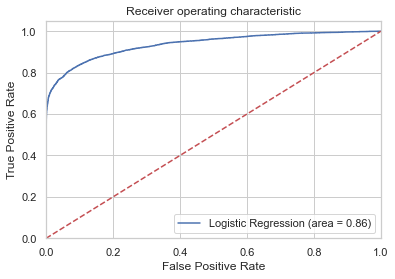

In [56]:
logit_roc_auc = roc_auc_score(y_test_res, rf.predict(x_test_res))
fpr, tpr, thresholds = roc_curve(y_test_res, rf.predict_proba(x_test_res)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

<BarContainer object of 12 artists>

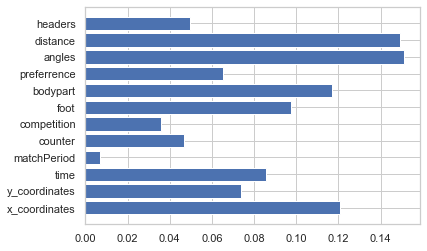

In [57]:
plt.barh(X.columns, rf.feature_importances_)

It's common for a model's performance to not improve significantly, or even slightly decrease in the training set, while the performance in the test set may slightly improve when adjusting the hyperparameters of a model.

In our case, the suggested parameters after hyperparameter tuning are as follows: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_depth': None}. These parameters may have improved the model's performance by increasing the number of trees in the model and reducing the minimum number of samples required to split a node and the minimum number of samples required to form a leaf node. Additionally, increasing the maximum depth of the tree may have allowed the model to capture more complex patterns in the data.

# 2.3 CONCLUSION OF THE MODELS

Two models were created to predict football goals using xG (Expected Goal model) : Logistic Regression and Random Forest.
Initially, the training and testing precision seemed high, but when looking at the confusion matrix, it was clear that the models were not predicting goals well. Additionally, the AUC for both models was only around 0.56, which is essentially random guessing. This was likely due to the predictor variable being unbalanced, so addressing this issue could help improve the models.

We applied SMOTE to the dataset, which serves to balance the predictor class by generating synthetic instances of the minority class (goals) to match the number of instances of the majority class (no goals).

In Logistic Regression, both training and testing accuracy have decreased by 0.2. However, it now predicts better the shots that were not goals, as seen in the confusion matrix. The AUC is 0.72, which is a significant improvement compared to the previous model. Although the model has improved considerably, there is still room for improvement.

On the other hand, in Random Forest, the training accuracy has remained the same, and the testing accuracy has slightly increased. The AUC is 0.86, which is a much better result than the Logistic Regression model. Therefore, the Random Forest model has significantly improved.

Finally, we performed hyperparameter tuning on both models, but the improvements were barely noticeable.

The Random Forest model performed better than the Logistic Regression model, potentially due to the complex interactions between the predictors in the dataset. Additionally, Random Forest is known to handle non-linear relationships and high-dimensional data better than Logistic Regression.

# 3 ANSWERING THE RESEARCH QUESTIONS

1. Which parameter has a bigger impact in the xG model?

For LR: It's possible that for the Logistic Regression model, the header and counter variables are the most important because they contain valuable information for predicting whether a shot will result in a goal or not. Headers are shots taken with the head, which tend to have a higher probability of scoring a goal due to the increased accuracy and power of the shot. Counters are shots taken quickly after regaining possession of the ball, catching the opposing team off-guard and increasing the probability of scoring a goal.

For RF: Distance and angle are crucial factors in goal prediction since they indicate the position of the ball in relation to the goal. Predicting the probability of scoring a goal depends on the distance from the goal as the closer the ball is, the higher the likelihood of scoring. Furthermore, the angle of the shot also plays a vital role as the sharper angles increase the chances of scoring compared to less sharp ones.


2. How does the distance and angle impact on the probability of scoring?

The distance and angle of a shot are important features that impact the probability of scoring a goal in football. The closer the shot is to the goal, the higher the probability of scoring. This is because the goalkeeper has less time to react to the shot and is therefore less likely to save it.

In terms of the angle, sharper angles (shots that are aimed towards the corners of the goal) can increase the probability of scoring compared to less sharp angles (shots aimed towards the center of the goal). This is because a shot aimed towards the corner of the goal is more difficult for the goalkeeper to save than a shot aimed towards the center of the goal, as they have to cover more distance to make the save.

3. Which model has a better performance?

Random Forest may perform better than Logistic Regression in this case because it can handle non-linear relationships between the features and the outcome variable, while Logistic Regression assumes a linear relationship. Also, Random Forest is a powerful ensemble method that can capture complex interactions between the features and the outcome variable. Additionally, Random Forest is less sensitive to outliers and can handle a large number of features.

# 4 ETHICAL CONSIDERATIONS

An xG model is a statistical model used in soccer to estimate the probability of a goal being scored from a given shot. These models have become increasingly popular in recent years, and they have been used to inform tactical decisions, player recruitment, and performance analysis.

However, there are several ethical considerations that must be taken into account when using xG models extensively. Here are some examples:

Data bias: xG models rely on large datasets to make accurate predictions. However, if the data used to train the model is biased, the predictions can also be biased. For instance, if the model is trained on data from only one league or geography, it may not accurately reflect the performance of players from other leagues or geographies. It's essential to ensure that the data used to train the model is diverse and representative.

Fairness: xG models can be used to evaluate player performance and inform decisions about player recruitment. However, if the model is biased against certain players or groups, it can lead to unfair outcomes. For instance, if the model is biased against players from certain demographics, it can limit their opportunities and perpetuate existing inequalities. It's crucial to ensure that the model is fair and unbiased towards all players.

Transparency: xG models can be complex and difficult to interpret. It's important to ensure that the model is transparent, and the factors that contribute to its predictions are clearly explained. This can help to build trust in the model and ensure that it's being used responsibly.

Privacy: xG models rely on data about players, such as their position on the pitch, shot location, and other performance metrics. It's important to ensure that this data is collected and used ethically and with the players' privacy in mind. The data should be anonymized and used only for the intended purposes.

Accountability: Finally, it's important to ensure that the use of xG models is accountable. There should be clear guidelines and standards for their use, and they should be subject to independent review and evaluation. This can help to ensure that the models are being used responsibly and in the best interests of all stakeholders.

In summary, while xG models can provide valuable insights into player performance and inform tactical decisions, it's essential to consider their ethical implications carefully. By ensuring that these models are fair, transparent, and accountable, we can maximize their potential while minimizing the risk of unintended consequences.